In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.datasets import load_boston,make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
boston=load_boston()
x= boston.data
y= boston.target

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
#스케일러
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

In [4]:
#train,test데이터 분할
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,
                                              test_size=0.3,
                                              random_state=0)

In [5]:
x_train.shape

(354, 13)

In [6]:
y_train.shape

(354,)

In [7]:
x_test.shape

(152, 13)

In [8]:
y_test.shape

(152,)

In [9]:
#svr 모델 정의,학습
#비선형 -가우시안, gamma='auto'
svr = SVR(kernel='rbf',gamma='auto')

In [10]:
#모델 학습
svr.fit(x_train,y_train)

SVR(gamma='auto')

In [11]:
#svr모델 스코어 뽑기
scores = svr.score(x_train,y_train)
#회귀모델이므로 model.score()의 기준 = r2_score
print('R-squared:',scores)

R-squared: 0.38714677444380763


In [12]:
cv_scores = cross_val_score(svr,x_scale,y,cv= 5)
print('CV mean score',cv_scores.mean())
#교차검증, cross_val_score(model,학습데이터,학습데이터 정답값,cv개수)

CV mean score 0.15191153352927586


In [13]:
#예측값 산출
pred = svr.predict(x_test)
#mse(평균제곱오차)값 산출
mse = mean_squared_error(y_test,pred)
print('MSE:',mse)

MSE: 55.32889250645819


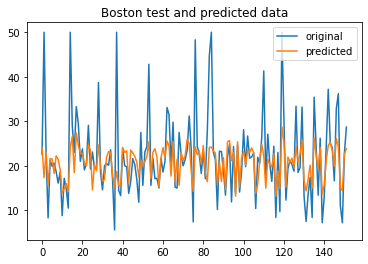

In [14]:
#그래프 시각화
x_ax = range(len(y_test))

plt.plot(x_ax,y_test,label='original')
plt.plot(x_ax,pred,label='predicted')
plt.title('Boston test and predicted data')
plt.legend()
plt.show()

### 그리드서치

In [15]:
#모델 선정
svm=SVR(kernel='rbf')
#선정모델의 파라미터 딕셔너리화
parameters={'C':[0.001,0.01,0.1,1,10,25,50,100],
            'gamma':[0.001,0.01,0.1,1,10,25,50,100]}

In [16]:
#그리드서치
grid_svm=GridSearchCV(svm,param_grid=parameters,cv=5)

In [17]:
#모델학습
grid_svm.fit(x_scale,y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]})

In [18]:
#데이터 프레임 생성
result=pd.DataFrame(grid_svm.cv_results_['params'])
#model.cv_results_에서 'params'열 추출해서 데이터프레임화(파라미터)
result['평균 score'] = grid_svm.cv_results_['mean_test_score']
#model.cv_results_에서 'params'열 추출해서 데이터프레임화(교차검증 평균값)
result.sort_values(by='평균 score',ascending=False)
#평균 score열이 큰값부터 정렬

,C,gamma,평균 score
58,100.0,0.10,0.613716
50,50.0,0.10,0.610651
42,25.0,0.10,0.573947
34,10.0,0.10,0.518897
57,100.0,0.01,0.504687
...,...,...,...
46,25.0,50.00,-0.607953
39,10.0,100.00,-0.620004
55,50.0,100.00,-0.689042
63,100.0,100.00,-0.689042


### 최적의 모델

In [19]:
#모델 선정,학습
svr = SVR(kernel='rbf',gamma=0.1,C=100)
svr.fit(x_train,y_train)

SVR(C=100, gamma=0.1)

In [20]:
#교차검증
cv_score = cross_val_score(svr,x_scale,y,cv=5)

In [21]:
print('CV mean score:',cv_score.mean())

CV mean score: 0.6137158223739019


In [22]:
#예측값 산출
pred = svr.predict(x_test)

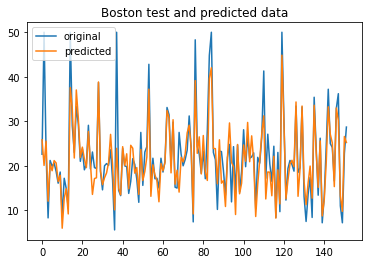

In [23]:
#그래프 시각화
x_ax=range(len(y_test))

plt.plot(x_ax,y_test,label='original')
plt.plot(x_ax,pred,label='predicted')
plt.title("Boston test and predicted data")
plt.legend()
plt.show()